In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [3]:
# problem 1
data = pd.read_csv('./usgs_earthquakes.csv')
df = data.sort_values(by="mag" , ascending=False)[0:50]



Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

c:\users\wangyao\pycharmprojects\untitled\venv\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\users\wangyao\pycharmprojects\untitled\venv\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\users\wangyao\pycharmprojects\untitled\venv\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
c:\us

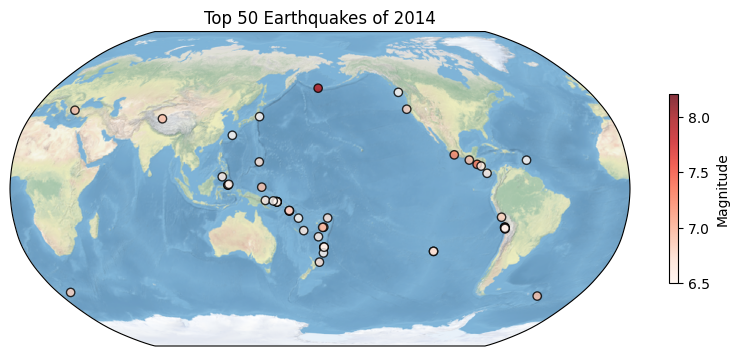

In [4]:
plt.figure(figsize=(10,10), dpi=100)
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)
ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
# cm = plt.cm.get_cmap('hot')
ax.stock_img()
sc = ax.scatter(df.longitude,df.latitude, # s= (0.2* 2 ** df.mag)**2,
               edgecolors='k',
               c=df.mag, alpha=0.8,cmap = 'Reds',
               transform=ccrs.PlateCarree())
cbar = plt.colorbar(sc,shrink=0.25)
cbar.ax.set_ylabel('Magnitude')
ax.set_title('Top 50 Earthquakes of 2014')


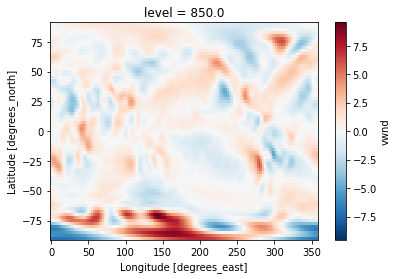

In [7]:
# problem 2

def frange(start,stop=None,step=1):
    result = []
    if stop==None:
        stop=start
        start=0.0
    if step>=1:
        while start < stop:
            result.append(float(start))
            start +=step
    elif step<=-1:
        while start > stop:
            result.append(float(start))
            start +=step
    return result


ds = xr.open_dataset('./vwnd.mon.mean.nc', engine="netcdf4")
# ds.vwnd[-1].plot()
# ds.vwnd.mean(dim=['time']).plot()
vwind_G = ds.vwnd.sel(level=850,time=slice("1960-01", "2019-12"))
vwind_G.mean(dim=['time']).plot()
# plt.show()
# date = pd.date_range('1949-01-01 00:00:00','2020-01-01 00:00:00',freq='M')
vwind_EA = ds.vwnd.sel(lon=frange(110.0,142.5,2.5), lat=frange(10.0,42.5,2.5), level=850,time=slice("1960-01", "2019-12"))  # [110,112.5,140]
Vwind_ea = vwind_EA.mean(dim=['time'])
# plt.show()

In [ ]:
plt.figure(figsize=(5,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 126.25, 26.25 # Shenzhen
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

Vwind_ea.plot.contourf(transform=ccrs.PlateCarree(),
               add_colorbar=False)
# Set a region and plot
extent = [central_lon-14.25, central_lon+12.25, central_lat-14.25, central_lat+12.25]
ax.set_extent(extent)

# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)

# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
ax.gridlines()

c:\users\wangyao\pycharmprojects\untitled\venv\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\users\wangyao\pycharmprojects\untitled\venv\lib\site-packages\cartopy\crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
c:\users\wangyao\pycharmprojects\untitled\venv\lib\site-packages\cartopy\crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


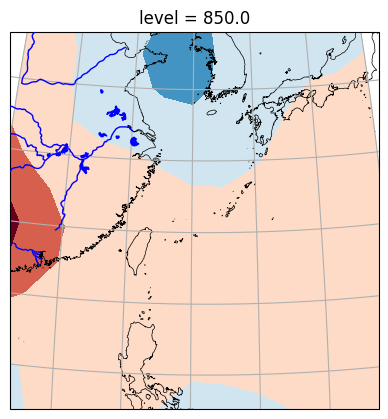